In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start , end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-30,3.235373,3.295149,3.212957,3.227901,3.219993,276468402
2004-10-01,3.257789,3.343468,3.210466,3.302123,3.294034,303934969
2004-10-04,3.368624,3.408972,3.338237,3.363891,3.355650,261693228
2004-10-05,3.353929,3.450317,3.293655,3.446332,3.437889,300887589
2004-10-06,3.425909,3.448325,3.387304,3.414203,3.405839,268900140


In [6]:
google_data.shape

(5034, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,46.502884,46.992394,46.038154,46.522444,46.412153,1.142615e+08
std,44.495813,44.984789,44.059615,44.524027,44.425150,1.490328e+08
min,3.235373,3.295149,3.210466,3.227901,3.219993,1.584340e+05
25%,13.148155,13.275366,13.011417,13.136760,13.104578,2.701688e+07
50%,27.419720,27.623909,27.118047,27.402023,27.334893,5.348900e+07
75%,61.395001,61.972125,60.780636,61.344249,61.193968,1.396234e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-30 to 2024-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of google data')

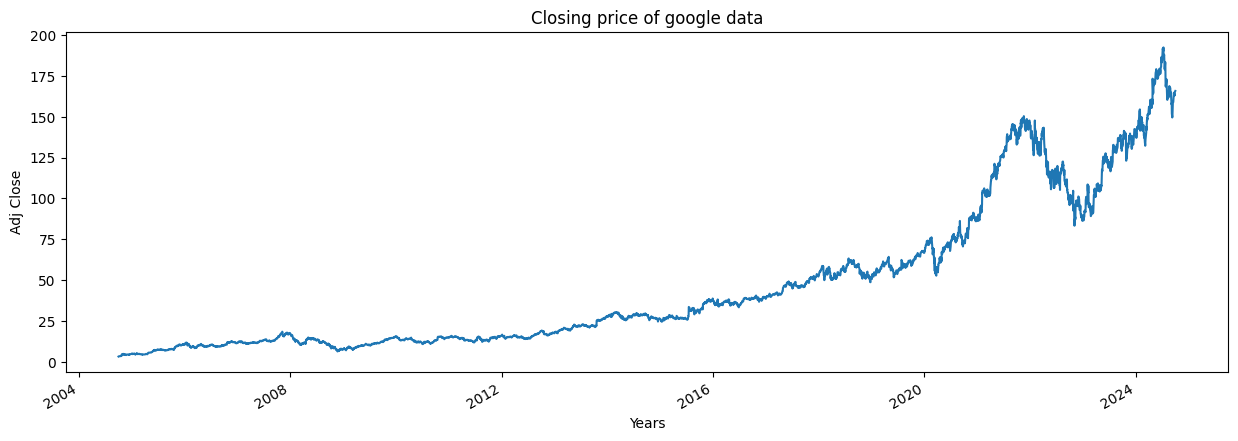

In [11]:
plt.figure(figsize= (15,5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of google data")

In [12]:
def plot_graph(figsize,values, column_name):
    plt.figure()
    values.plot(figsize= figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data")

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

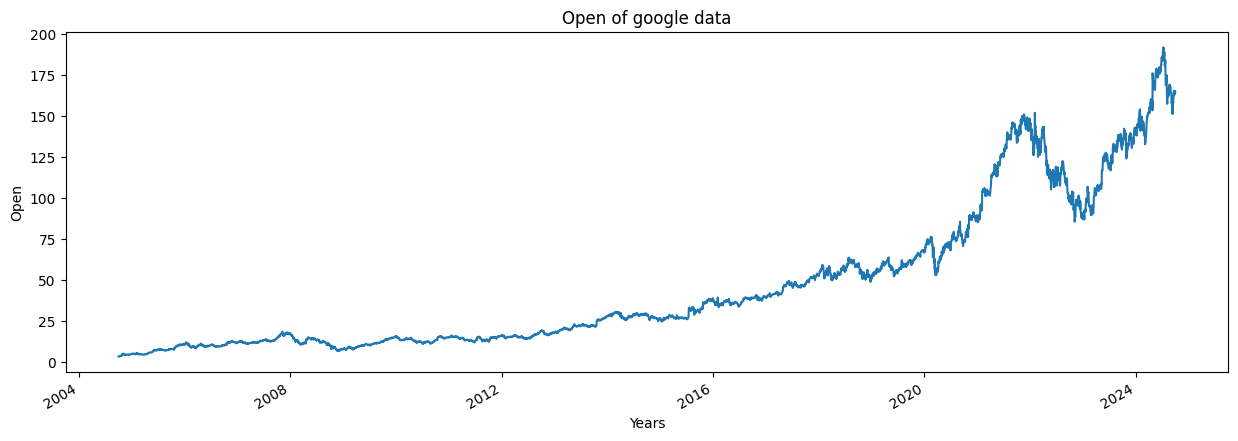

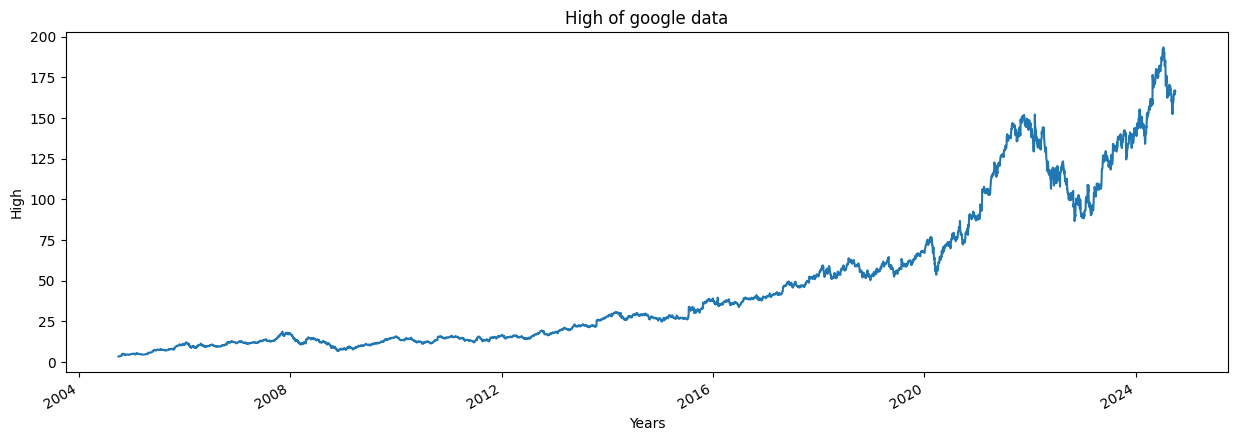

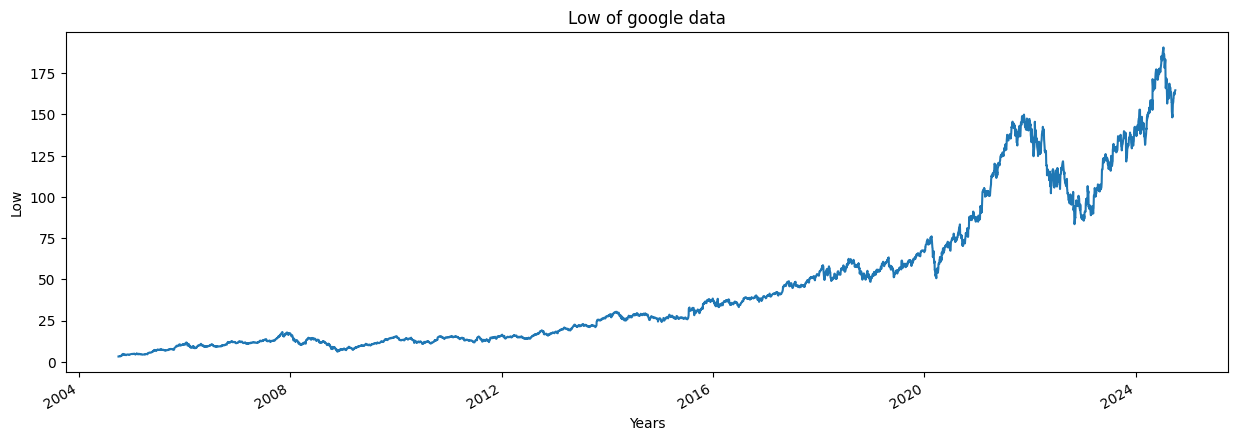

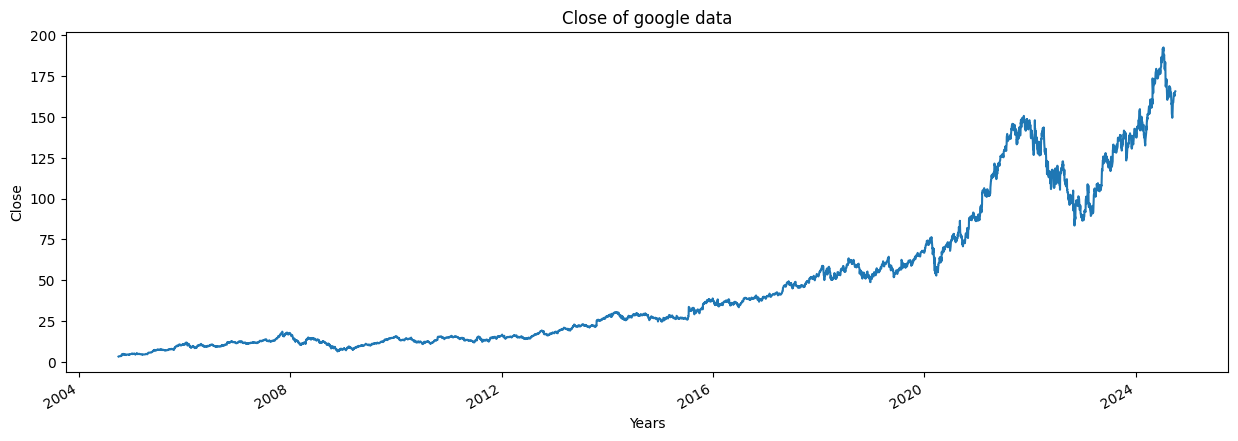

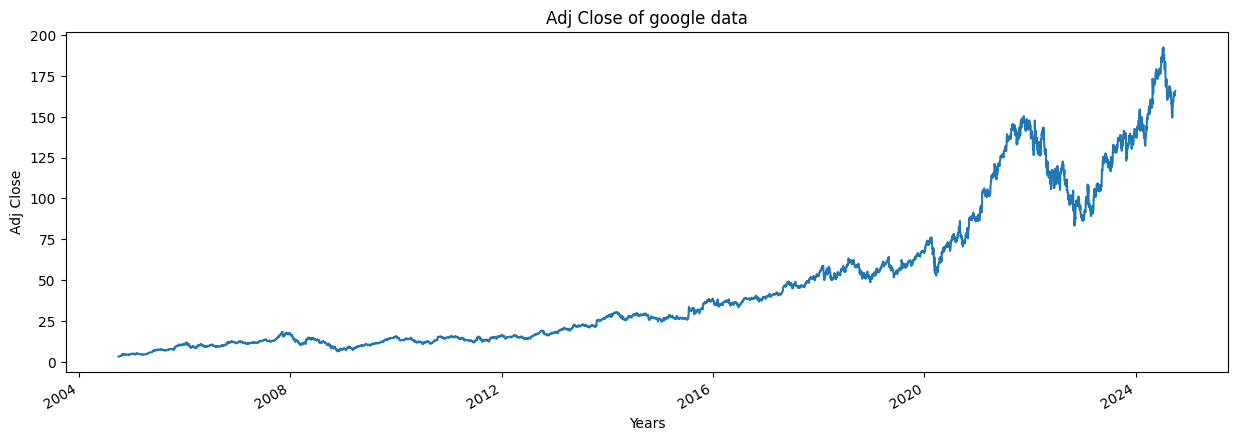

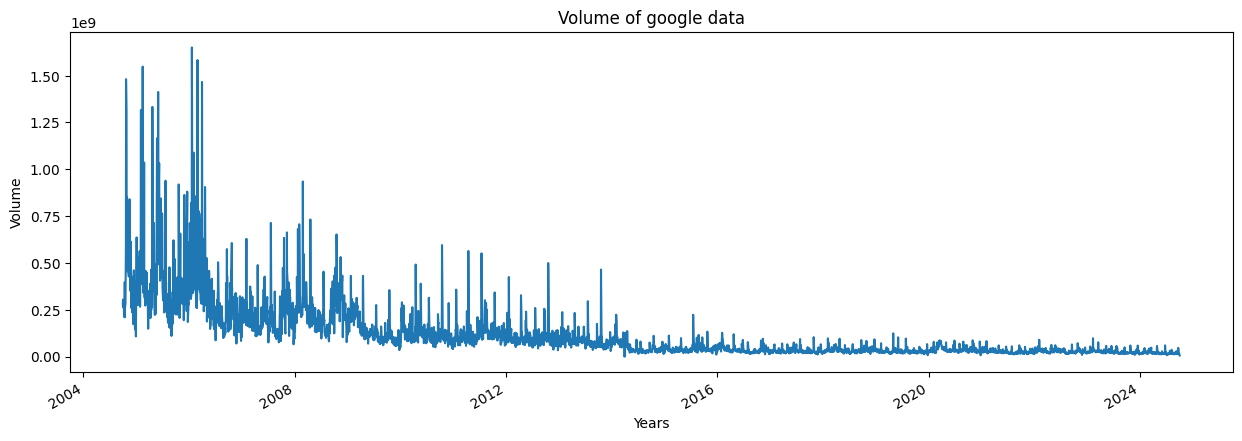

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [15]:
import pandas as pd

In [16]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 65
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 188


In [17]:
google_data['Moving average 250 days'] = google_data['Adj Close'].rolling(250).mean()
google_data['Moving average 250 days']

Date
2004-09-30           NaN
2004-10-01           NaN
2004-10-04           NaN
2004-10-05           NaN
2004-10-06           NaN
                 ...    
2024-09-24    154.243819
2024-09-25    154.371227
2024-09-26    154.495331
2024-09-27    154.630383
2024-09-30    154.754068
Name: Moving average 250 days, Length: 5034, dtype: float64

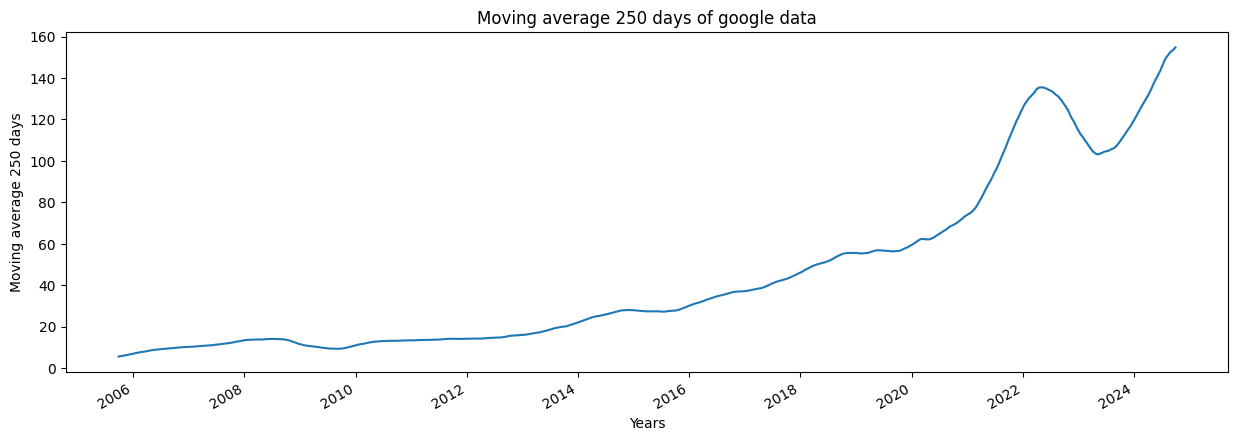

In [18]:
plot_graph((15,5),google_data['Moving average 250 days'],'Moving average 250 days')

<Figure size 640x480 with 0 Axes>

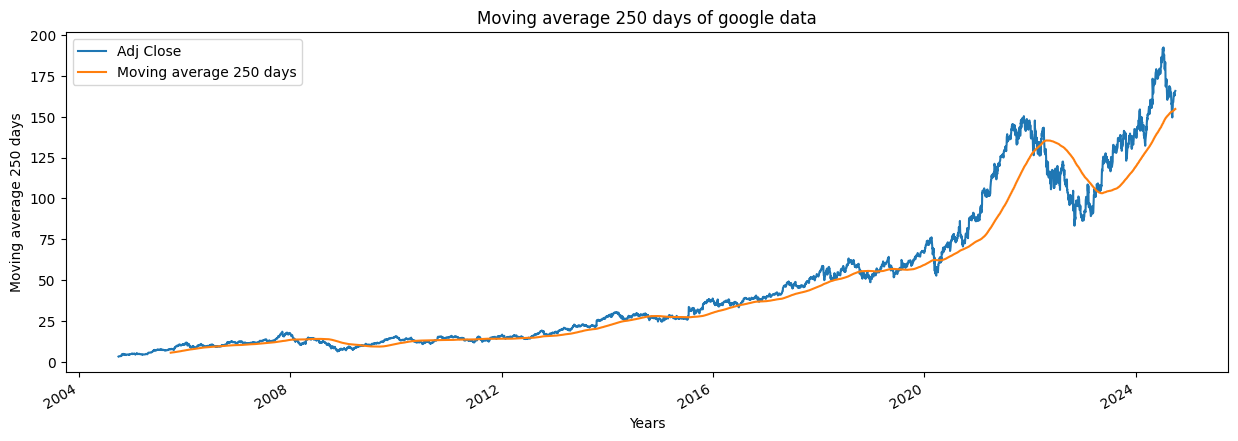

In [19]:
plot_graph((15,5),google_data[['Adj Close','Moving average 250 days']],'Moving average 250 days')

<Figure size 640x480 with 0 Axes>

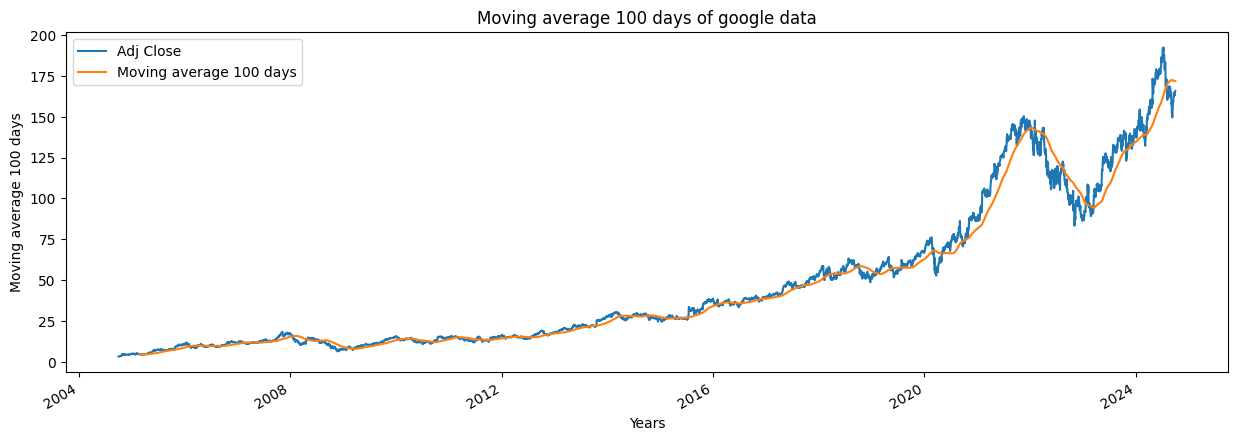

In [20]:
google_data['Moving average 100 days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','Moving average 100 days']],'Moving average 100 days')

<Figure size 640x480 with 0 Axes>

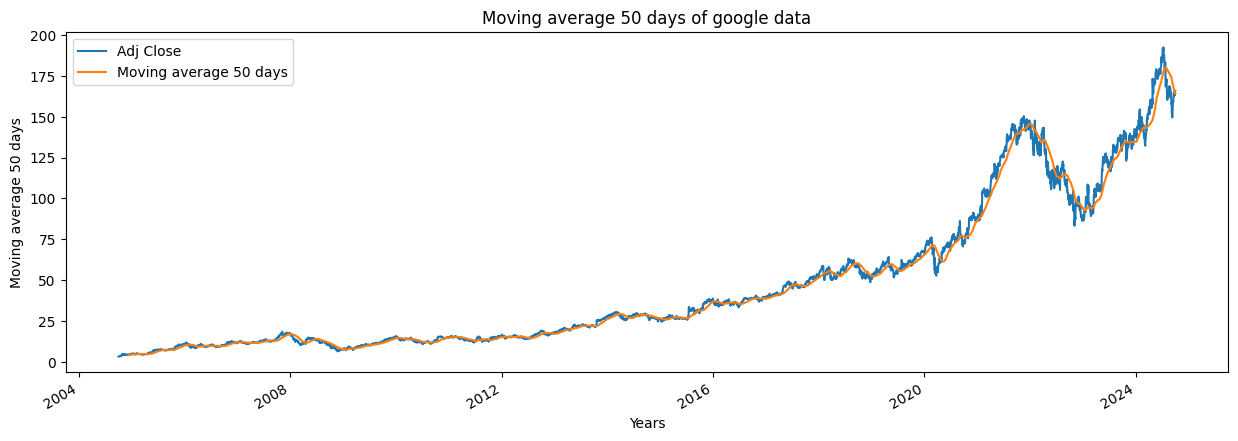

In [21]:
google_data['Moving average 50 days'] = google_data['Adj Close'].rolling(50).mean()
plot_graph((15,5),google_data[['Adj Close','Moving average 50 days']],'Moving average 50 days')

<Figure size 640x480 with 0 Axes>

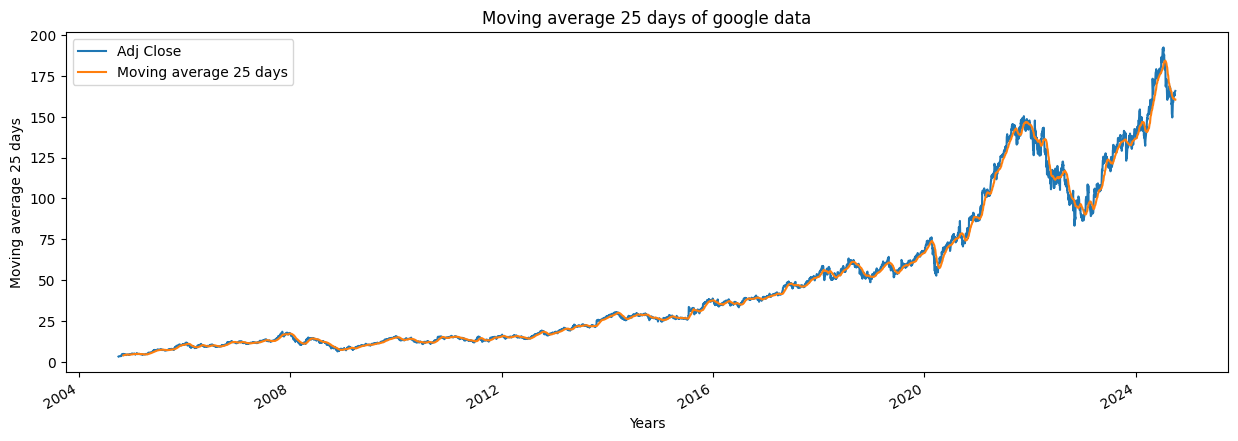

In [22]:
google_data['Moving average 25 days'] = google_data['Adj Close'].rolling(25).mean()
plot_graph((15,5),google_data[['Adj Close','Moving average 25 days']],'Moving average 25 days')

In [23]:
google_data['perecentage_cp'] = google_data['Adj Close'].pct_change()
google_data['perecentage_cp']

Date
2004-09-30         NaN
2004-10-01    0.022994
2004-10-04    0.018706
2004-10-05    0.024508
2004-10-06   -0.009323
                ...   
2024-09-24    0.003495
2024-09-25   -0.003972
2024-09-26    0.005154
2024-09-27    0.008912
2024-09-30    0.002843
Name: perecentage_cp, Length: 5034, dtype: float64

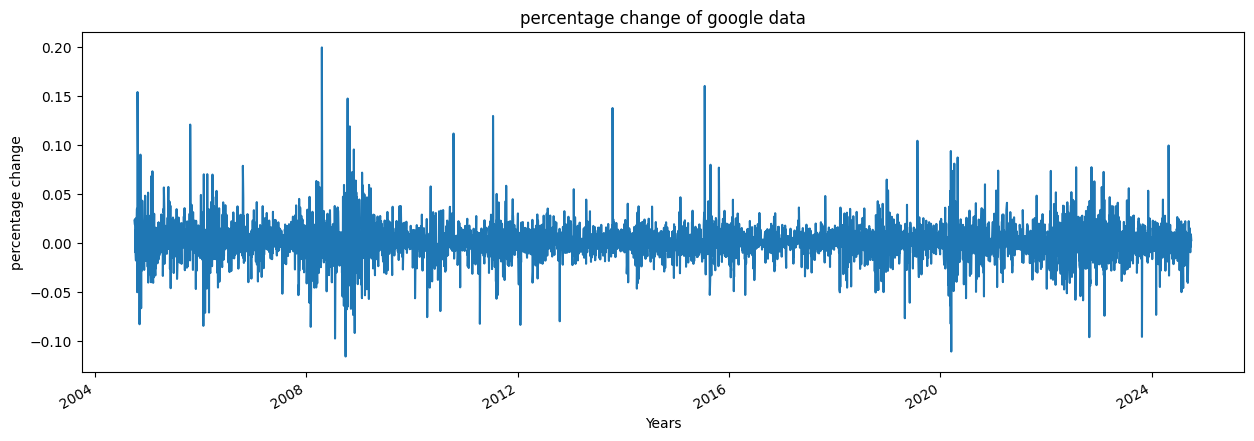

In [24]:
plot_graph((15,5),google_data['perecentage_cp'],'percentage change')

In [25]:
Adjusted_Closed_Price = google_data['Adj Close']
Adjusted_Closed_Price_df = Adjusted_Closed_Price.to_frame()


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adjusted_Closed_Price_df)
scaled_data


array([[0.00000000e+00],
       [3.91360296e-04],
       [7.17052585e-04],
       ...,
       [8.48949653e-01],
       [8.56666851e-01],
       [8.59151175e-01]])

In [28]:
len(scaled_data)

5034

In [29]:
x_data = []
y_data = []

for i in range(25,len(scaled_data)):
    x_data.append(scaled_data[i-25:i])
    y_data.append(scaled_data[i])

import numpy as np 

x_data, y_data = np.array(x_data),np.array(y_data)

In [30]:
x_data[0],y_data[0]

(array([[0.        ],
        [0.00039136],
        [0.00071705],
        [0.00115175],
        [0.00098234],
        [0.00121479],
        [0.0010677 ],
        [0.00074332],
        [0.00102436],
        [0.00148401],
        [0.00162847],
        [0.00190558],
        [0.00256879],
        [0.00240857],
        [0.00143017],
        [0.00259768],
        [0.00562481],
        [0.00759079],
        [0.00685535],
        [0.00740299],
        [0.00836563],
        [0.0080163 ],
        [0.00872415],
        [0.00857182],
        [0.00815156]]),
 array([0.00723621]))

In [31]:
int(len(x_data)*0.7)

3506

In [32]:
5034-100-int(len(x_data)*0.7)

1428

In [33]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3506, 25, 1)
(3506, 1)
(1503, 25, 1)
(1503, 1)


In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

d:\Stock Prediction\v\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - loss: 2.2622e-04
Epoch 2/2
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 52s 15ms/step - loss: 4.1852e-05


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [40]:
prediction = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [41]:
prediction

array([[0.2814141 ],
       [0.2791505 ],
       [0.27126855],
       ...,
       [0.8018557 ],
       [0.8035042 ],
       [0.8092943 ]], dtype=float32)

In [42]:
inv_predictions = scaler.inverse_transform(prediction)
inv_predictions

array([[ 56.45981 ],
       [ 56.031563],
       [ 54.540405],
       ...,
       [154.92044 ],
       [155.23233 ],
       [156.32773 ]], dtype=float32)

In [44]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 56.80150604],
       [ 53.92856216],
       [ 53.83379364],
       ...,
       [163.83000183],
       [165.28999329],
       [165.75999451]])

In [47]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))
rmse

4.641108041221918

In [51]:
print(len(inv_y_test.reshape(-1)))  
print(len(inv_predictions.reshape(-1)))  
print(len(google_data.index[splitting_len + 100 :]))  

1503
1503
1428


In [54]:
plotting_data = pd.DataFrame(
    {
        'original test data':inv_y_test.reshape(-1),
        'prediction':inv_predictions.reshape(-1)
    },
    index= google_data.index[-1503:]
    
)
plotting_data.head()

,original test data,prediction
Date,,
2018-10-09,56.801506,56.459808
2018-10-10,53.928562,56.031563
2018-10-11,53.833794,54.540405
2018-10-12,55.368031,53.597786
2018-10-15,54.478710,54.044289


<Figure size 640x480 with 0 Axes>

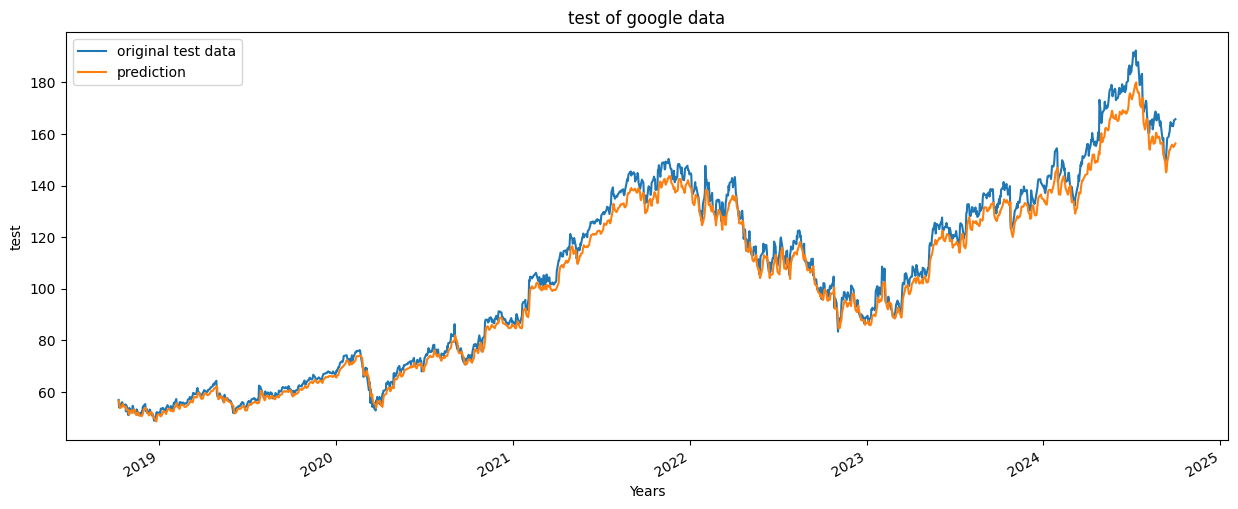

In [55]:
plot_graph((15,6), plotting_data, 'test')

<Figure size 640x480 with 0 Axes>

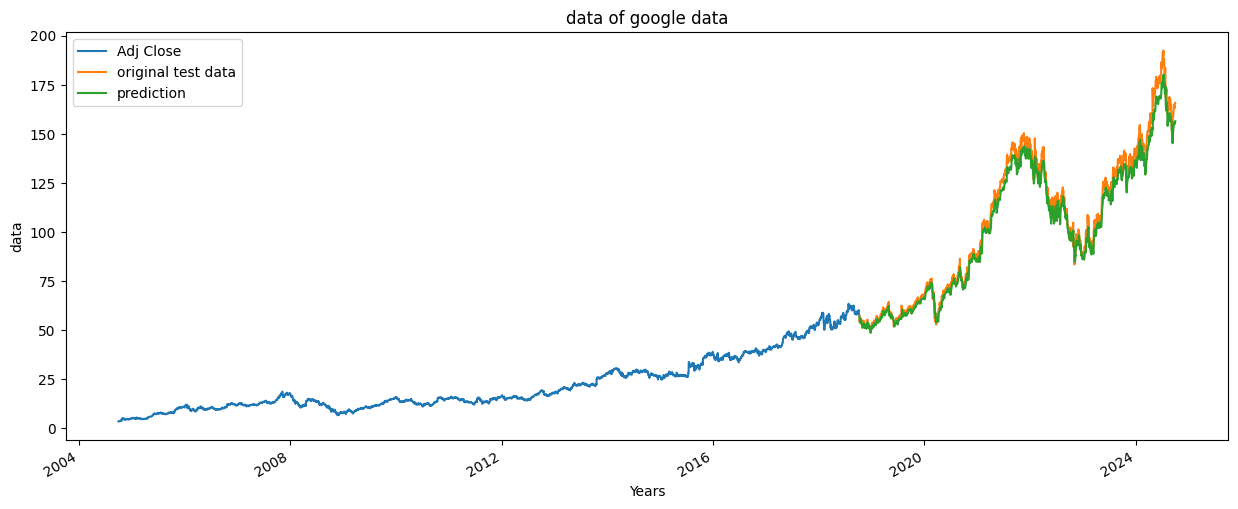

In [58]:
plot_graph((15,6), pd.concat([Adjusted_Closed_Price[:splitting_len + 25], plotting_data], axis=0),'data')

In [59]:
model.save("stock_prediction.keras")